<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch9_1~4_pg_562~579.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**chap9 추천시스템**
###**01 추천시스템의 개요와 배경**

**추천시스템**

- 여러 기업들은 추천시스템을 통해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 제공해 고객을 오래머무르게 하려고 노력을 기울이고 있다.
- 하나의 콘텐츠를 선택하였을 때 연관된 추천 콘텐츠가 사용자의 관심을 얼마나 끌지, 개인에게 맞춘 콘텐츠를 추천했는지는 사이트의 평판을 좌우하는 중요요소이다.

**온라인 스토어의 필수요소, 추천시스템**
- 많은 상품, 한정된 시간으로 추천시스템은 온라인 스토어의 필수요소가 되었다.

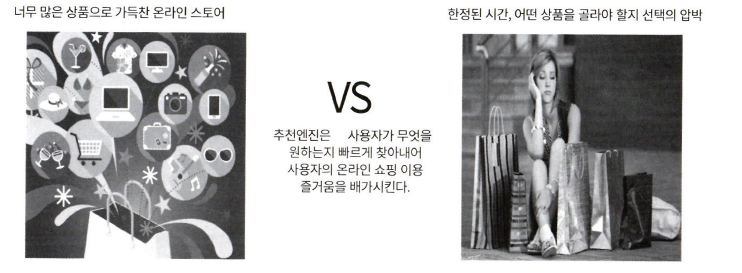

- 사용자가 어떤 상품을 구매했는가?
- 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
- 사용자가 평가하느 제품은?
- 사용자가 스스로 작성한 취향은?
- 무엇을 추천했는가?

-> 해당 내용을 수집해 친숙한 문구로 상품구매유도

**추천시스템 유형**
- 콘텐츠 기반 필터링
- 협업필터링
- - 최근접이웃협업 필터링
- - 잠재요인 필터링 (주로 사용)

###**02콘텐츠기반 필터링 추천시스템**
- 콘텐츠와 유사한 것을 매칭하여 추천한다.

###**03최근접 이웃 협업 필터링**
- 친구에게 물어보는 것과 유사한 방식, 사용자가 아이템에 매긴 평점이나 구매이력과 같은 행동양식을 기반으로 추천을 수행하는 것이 협업 필터링

- 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 아직 예측하지 않은 것을 평가하는 것이다.

- - 행: 개별사용자, 열: 개별아이템
- - pivot_table()함수를 사용해 사용자-아이템 평점 행렬로 변환시킨다.

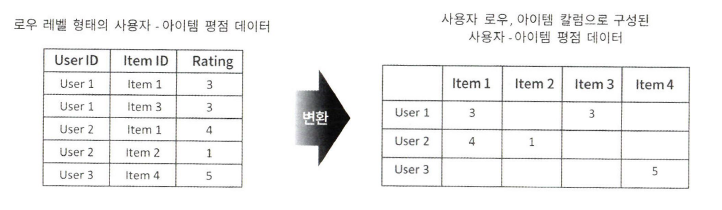

- 사용자-아이템 평점 행렬은 다차원 행렬이며, 희소행렬 특징을 가지고 있다.

종류


- 사용자기반: 당신과 비슷한 고객들이 다음 상품도 구매했습니다.
- 아이템기반: 이 상품을 선택한 다른 고객들도 다음 상품을 구매했습니다.

###**04 잠재요인 협업필터링**
- 사용자-아이템 평점 매트릭스에 숨어있는 잠재요인을 추출하여 추천 예측을 할 수 있는 기법이다.
- SVD와 같은 차원감소기법으로 분해하는 과정에서 잠재요인을 추출하는데, 이를 행렬분해라고 한다.
1. 잠재요인을 기반으로 다차원 희소행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재요인 행렬과 아이템-잠재요인 행렬의 전치행렬로 분해할 수 있다.
2.  분해된 두 행렬의 내적을 통해 새로운 예측 사용자- 아이템 평정 행렬데이터를 만들어 평점을 부여하지 않은 부분에 평점을 생성하는 것이 잠재요인 알고리즘이다.

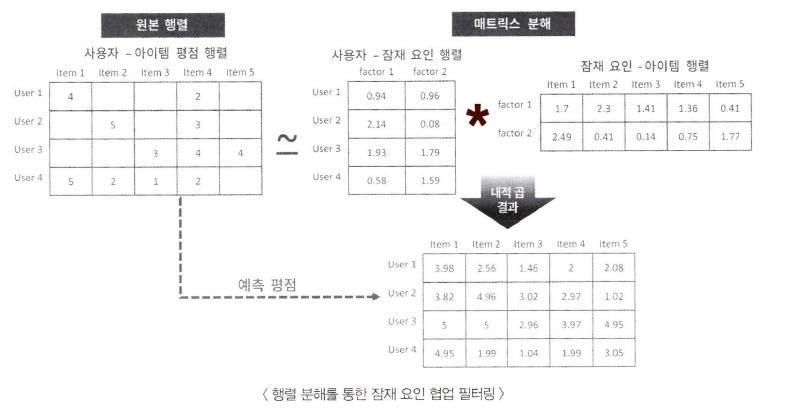

- 잠재요인 협업 필터링중 사용자-아이템 평점 행렬과 같이 다차원의 매트릭스를 저차원의 매트릭스로 분해하는 기법을 행렬분해라고 한다.

**행렬분해**
- 다차원 매트릭스를 저차원 매트릭스로 분해하는 기법으로 대표적으로 SVD, NMF가 있다.
- M개의 사용자 행과 N개의 아이템 열을 가진 행렬은 MXN차원으로 구성된다.

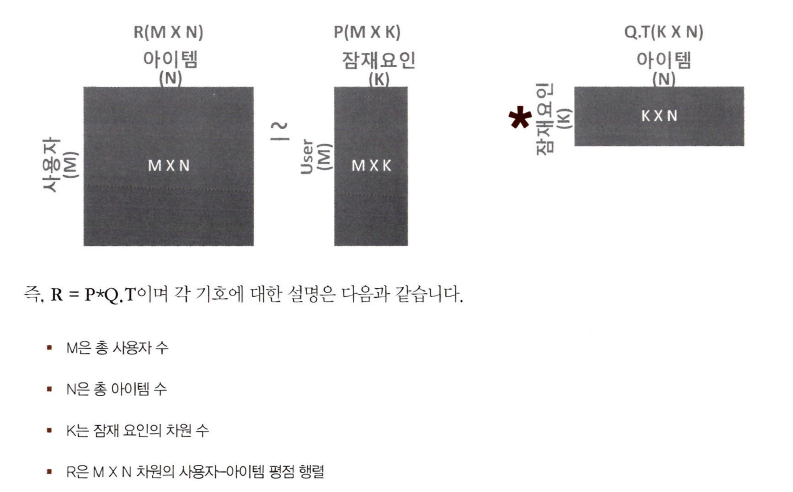

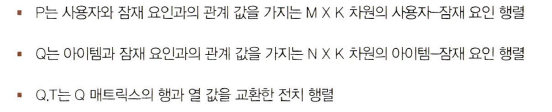

**확률적 경사 하강법을 이용한 행렬분해**
- SVD방식이 되지 않을때 사용
1. P와 Q를 임의의 값을 가진 행렬로 설정한다.
2. P와 Q,T값을 곱해 예측 R행렬을 계산하고 예측 R행렬과 실제 R행렬의 오류값을 계산한다.
3. 오류값을 최소화할 수 있도록 P와 Q행렬을 적절한 값으로 업데이트한다.
4. 만족할만한 오류값을 가질때 까지 2~3번 작업을 반복해 근사화시킨다.

In [1]:
import numpy as np
# 원본행렬 R 생성, 분해행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R=np.array([[4,np.NaN,np.NaN,2,np.NaN],
           [np.NaN,5,np.NaN,3,1],
           [np.NaN,np.NaN,3,4,4],
           [5,2,1,2,np.NaN]])
num_users,num_items=R.shape
K=3
# P와 Q 행렬의 크기를 지정하고 정규분포를 가진 임의의 값으로 입력함
np.random.seed(1)
P=np.random.normal(scale=1./K,size=(num_users,K))
Q=np.random.normal(scale=1./K,size=(num_items,K))

In [2]:
from sklearn.metrics import mean_squared_error
def get_rmse(R,P,Q,non_zeros):
    error=0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 행렬 생성
    full_pred_matrix=np.dot(P,Q.T)
    # 실제 행렬에서 널이 아닌 값의 위치 인덱스를 추출해 실제 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]

    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

In [3]:
# R>0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369648
### iteration step :  100  rmse :  0.1564340384819247
### iteration step :  150  rmse :  0.07455141311978046
### iteration step :  200  rmse :  0.04325226798579314
### iteration step :  250  rmse :  0.029248328780878973
### iteration step :  300  rmse :  0.022621116143829466
### iteration step :  350  rmse :  0.019493636196525135
### iteration step :  400  rmse :  0.018022719092132704
### iteration step :  450  rmse :  0.01731968595344266
### iteration step :  500  rmse :  0.016973657887570753
### iteration step :  550  rmse :  0.016796804595895633
### iteration step :  600  rmse :  0.01670132290188466
### iteration step :  650  rmse :  0.01664473691247669
### iteration step :  700  rmse :  0.016605910068210026
### iteration step :  750  rmse :  0.016574200475705
### iteration step :  800  rmse :  0.01654431582921597
### iteration step :  850  rmse :  0.01651375177473524
### iterati

In [4]:
# 분해된 P와 Q로 예측행렬을 만들어 출력
pred_matrix=np.dot(P,Q.T)
print('예측행렬:\n',np.round(pred_matrix,3))

예측행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
